In [2]:
import pandas as pd

# Load the necessary datasets
df_calls = pd.read_csv('callsf0d4f5a.csv')
df_reasons = pd.read_csv('reason18315ff.csv')
df_sentiment = pd.read_csv('sentiment_statisticscc1e57a.csv')  # Load sentiment data

print(df_calls[['call_id', 'call_transcript']].head())


      call_id                                    call_transcript
0  4667960400  \n\nAgent: Thank you for calling United Airlin...
1  1122072124  \n\nAgent: Thank you for calling United Airlin...
2  6834291559  \n\nAgent: Thank you for calling United Airlin...
3  2266439882  \n\nAgent: Thank you for calling United Airlin...
4  1211603231  \n\nAgent: Thank you for calling United Airlin...


In [3]:
#check for missing values
print(df_calls.isnull().sum())
print(df_reasons.isnull().sum())

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64


In [4]:
#cleaning transcripts
df_calls['call_transcript'] = df_calls['call_transcript'].str.replace(r'\n', '').str.strip()
df_calls['call_transcript'][0]

"Agent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help mak

In [5]:
#merge df_calls with df_reasons
df_calls = df_calls.merge(df_reasons, on='call_id', how='left')
df_calls = df_calls.merge(df_sentiment[['call_id', 'average_sentiment']], on='call_id', how='left')
df_calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,average_sentiment
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Agent: Thank you for calling United Airlines c...,Voluntary Cancel,-0.04
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,"Agent: Thank you for calling United Airlines, ...",Booking,0.02
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Agent: Thank you for calling United Airlines c...,IRROPS,-0.13
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,Agent: Thank you for calling United Airlines c...,Upgrade,-0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Agent: Thank you for calling United Airlines c...,Seating,-0.05
...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,Agent: Thank you for calling United Airlines c...,Post Flight,0.05
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,Agent: Thank you for calling United Airlines c...,Upgrade,0.03
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,Agent: Thank you for calling United Airlines c...,Upgrade,0.05
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,Agent: Thank you for calling United Airlines c...,NaN,-0.07


In [6]:
#cleaning primary_call_reasons
import re
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.strip()  
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.lower()  


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace('-', ' ')


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].replace({
    'products & services': 'products and services',
})

print(df_calls['primary_call_reason'].unique())
print(df_calls[['call_id', 'call_transcript', 'primary_call_reason']].head())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' nan 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc']
      call_id                                    call_transcript  \
0  4667960400  Agent: Thank you for calling United Airlines c...   
1  1122072124  Agent: Thank you for calling United Airlines, ...   
2  6834291559  Agent: Thank you for calling United Airlines c...   
3  2266439882  Agent: Thank you for calling United Airlines c...   
4  1211603231  Agent: Thank you for calling United Airlines c...   

  primary_call_reason  
0    voluntary cancel  
1             booking  
2              irrops  
3             upgrade  
4             seating  


In [7]:
# data pre-processing

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



stop_words = set(stopwords.words('english'))
custom_stopwords = {'im', 'like', 'etc', 'uh', 'um', 'you', 'the', 'to', 'and', 'a', 'in', 'for', 'of', 'that'}
combined_stopwords = stop_words.union(custom_stopwords)
lemmatizer = WordNetLemmatizer()


def preprocess_text_nltk(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    words = word_tokenize(text)  
    words = [word for word in words if word not in combined_stopwords]

    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)


df_calls['cleaned_transcript'] = df_calls['call_transcript'].apply(preprocess_text_nltk)


df_calls[['call_transcript', 'cleaned_transcript']].head()

,call_transcript,cleaned_transcript
0,Agent: Thank you for calling United Airlines c...,agent thank calling united airline customer se...
1,"Agent: Thank you for calling United Airlines, ...",agent thank calling united airline name sam he...
2,Agent: Thank you for calling United Airlines c...,agent thank calling united airline customer se...
3,Agent: Thank you for calling United Airlines c...,agent thank calling united airline customer se...
4,Agent: Thank you for calling United Airlines c...,agent thank calling united airline customer se...


In [8]:
 # Calculate the most frequent unigrams, bigrams, and trigrams
from collections import Counter
from nltk.util import ngrams

all_words = ' '.join(df_calls['cleaned_transcript']).split()


unigrams = Counter(all_words)
bigrams = Counter(ngrams(all_words, 2))
trigrams = Counter(ngrams(all_words, 3))

# Display the top unigrams, bigrams, and trigrams
print("Most common trigrams:", trigrams.most_common(300))


Most common trigrams: [(('thank', 'calling', 'united'), 88897), (('calling', 'united', 'airline'), 77512), (('agent', 'thank', 'calling'), 76486), (('agent', 'youre', 'welcome'), 72311), (('help', 'today', 'customer'), 66297), (('let', 'take', 'look'), 59181), (('please', 'let', 'know'), 51904), (('today', 'customer', 'hi'), 50169), (('good', 'rest', 'day'), 35483), (('united', 'airline', 'customer'), 33689), (('let', 'pull', 'reservation'), 33347), (('airline', 'customer', 'service'), 31491), (('may', 'help', 'today'), 26432), (('customer', 'service', 'name'), 25564), (('united', 'airline', 'name'), 24356), (('youre', 'welcome', 'glad'), 23748), (('welcome', 'glad', 'could'), 23086), (('agent', 'understand', 'frustration'), 22908), (('agent', 'problem', 'let'), 22882), (('calling', 'flight', 'booked'), 22797), (('rest', 'day', 'customer'), 22448), (('agent', 'okay', 'let'), 19828), (('flight', 'booked', 'chicago'), 18446), (('rest', 'day', 'agent'), 18422), (('anything', 'else', 'help

In [9]:
# Analyze the frequency of primary call reasons
reason_counts = df_calls['primary_call_reason'].value_counts()
print(reason_counts)


primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post flight               4330
communications            3840
products and services     3332
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
disability                 403
unaccompanied minor        104
Name: count, dtype: int64


In [10]:
# checking the calls which are self solvable and grouping using reasons

self_solving_phrases = [
    'calling flight booked',
    'customer service name',
    'rest day customer',
    'flight booked chicago',
    "thank calling united",
    "calling united airline",
    "agent thank calling",
    "agent youre welcome",
    "let take look",
    "please let know",
    "today customer hi",
    "good rest day",
    "let pull reservation",
    "airline customer service",
    "customer service name",
    "united airline name",
    "youre welcome glad",
    "welcome glad could",
    "calling flight booked",
    "flight booked chicago",
    "call disconnect agent",
    "thank flying united",
    "problem let pull",
    "youre welcome happy",
    "thank much help",
    "welcome happy could",
    "know would modify",
    "go ahead process",
    "look seat available",
    "chicago san francisco",
    "modify expand anything",
    "thanks much help",
    "san francisco next",
    "ive got reservation",
    "let see option",
    "confirmation number please",
    "change fee since",
    "number please customer",
    "reservation take look",
    "pull reservation take",
    "thanks taking call",
    "chicago los angeles",
    "flying united hope",
    "youll receive email",
    "bye agent goodbye",
    "need change date",
    "flight chicago la",
    "work better schedule",
    "taking call calling",
    "take look booking",
    "thanks flying united",
    "calling flight need"

]

def is_self_solvable(transcript, sentiment_score):
    transcript_lower = transcript.lower()
    is_self_solving = any(phrase in transcript_lower for phrase in self_solving_phrases)
    
    # Adjust self-solvable classification based on sentiment score
    if sentiment_score < 0:  
        return False
    return is_self_solving


df_calls['self_solvable'] = df_calls.apply(lambda row: is_self_solvable(row['cleaned_transcript'], row['average_sentiment']), axis=1)

# Group by primary_call_reason and calculate the total and self-solvable counts for each reason
reason_stats = df_calls.groupby('primary_call_reason').agg(
    total_calls=('call_id', 'size'),
    self_solvable_calls=('self_solvable', 'sum')
).reset_index()

# Calculate the percentage of self-solvable calls
reason_stats['self_solvable_percentage'] = (reason_stats['self_solvable_calls'] / reason_stats['total_calls']) * 100




non_self_solvable_reasons = [
    'disability',      # Typically requires agent intervention
    'unaccompanied minor',
    'other topics'# Requires special attention
]

reason_stats_filtered = reason_stats[~reason_stats['primary_call_reason'].isin(non_self_solvable_reasons)]

# Display the filtered results
print(reason_stats_filtered)

      primary_call_reason  total_calls  self_solvable_calls  \
0                 baggage         2832                 1624   
1                 booking         2637                 1523   
2                check in         1904                  843   
3                checkout         1888                  627   
4          communications         3840                 1672   
5         digital support         1225                  580   
7                     etc          952                  366   
8                  irrops        13311                 4450   
9            mileage plus         5851                 2653   
11            post flight         4330                 1584   
12  products and services         3332                 1558   
13        schedule change          731                  349   
14                seating         6365                 3650   
15       traveler updates          937                  553   
17                upgrade         2738                 

/var/folders/n9/xrhw7t1n1xs1bwwzqvckjkzh0000gn/T/ipykernel_19631/3280903877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


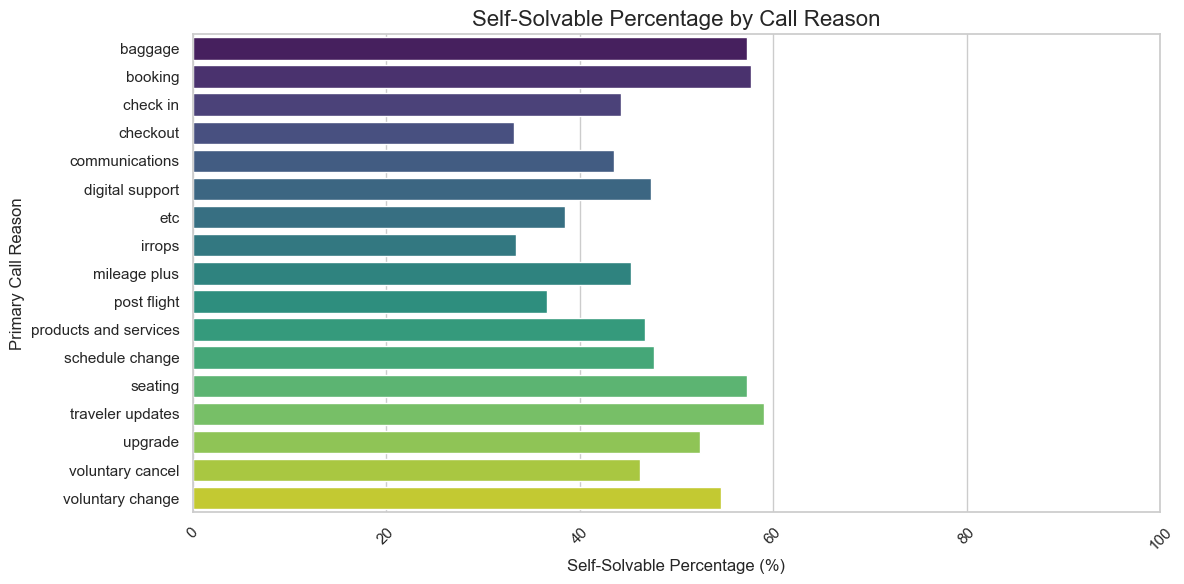

In [12]:
# plotting the all the percentages according to thire self-solvability
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(
    x='self_solvable_percentage', 
    y='primary_call_reason', 
    data=reason_stats_filtered, 
    palette='viridis'
)


plt.title('Self-Solvable Percentage by Call Reason', fontsize=16)
plt.xlabel('Self-Solvable Percentage (%)', fontsize=12)
plt.ylabel('Primary Call Reason', fontsize=12)
plt.xlim(0, 100)  
plt.xticks(rotation=45) 
plt.tight_layout()  


plt.show()


<Figure size 1200x800 with 0 Axes>

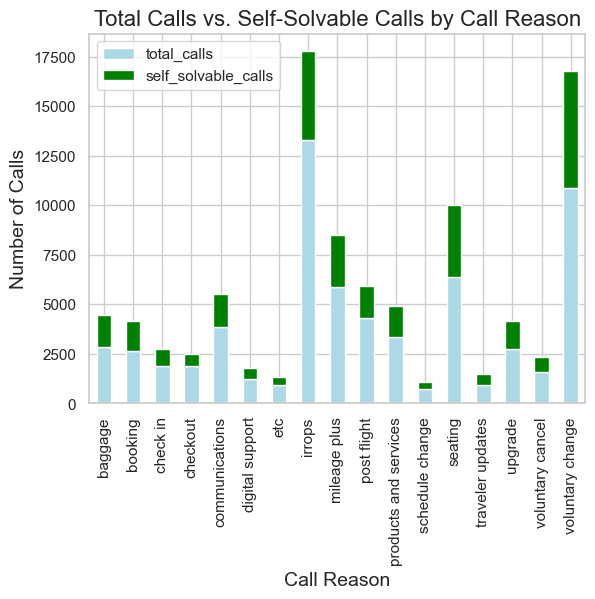

In [13]:
# plotting the volume of total calls and self-solvable calls
plt.figure(figsize=(12, 8))
reason_stats_filtered.set_index('primary_call_reason')[['total_calls', 'self_solvable_calls']].plot(kind='bar', stacked=True, color=['lightblue', 'green'])


plt.title('Total Calls vs. Self-Solvable Calls by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)


plt.show()


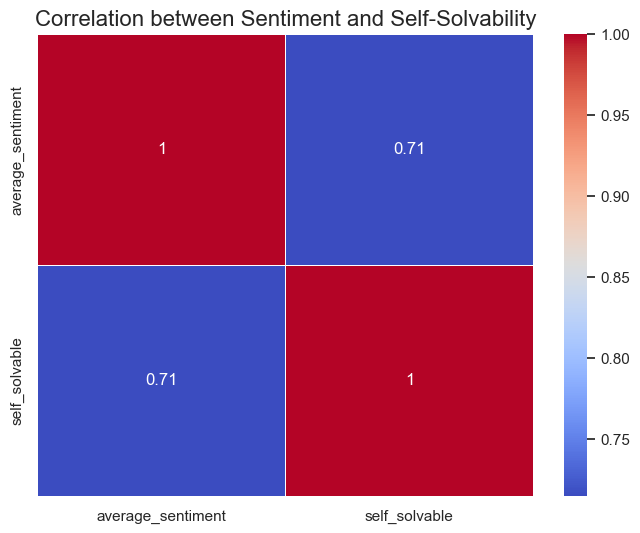

In [14]:
# correlation matrix between sentiment and self-solvability
correlation_matrix = df_calls[['average_sentiment', 'self_solvable']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Correlation between Sentiment and Self-Solvability', fontsize=16)


plt.show()
